# 作業

In [1]:
import pandas as pd
filterList = ['年度','經常性薪資-女/男','專業人員-女/男','技術員及助理專業人員-女/男','事務支援人員-女/男',
 '服務及銷售工作人員-女/男','技藝_機械設備操作及組裝人員-女/男','基層技術工及勞力工-女/男']
data = pd.read_csv('HW18__Data.csv')
data.drop(columns=filterList,inplace=True)#inplace=True 可修改原始資
data.replace(to_replace=r"…|—",value="0",regex=True,inplace=True)
data.rename(columns={'經常性薪資-薪資': '經常性',
'專業人員-薪資': '專業人員',
'技術員及助理專業人員-薪資': '技術員及助理',
'事務支援人員-薪資': '事務人員',
'服務及銷售工作人員-薪資': '服務銷售',
'技藝_機械設備操作及組裝人員-薪資': '機械設備操作',
'基層技術工及勞力工-薪資': '基層勞力'},inplace=True)
print(data.head())

         行業別    經常性   專業人員 技術員及助理   事務人員   服務銷售 機械設備操作   基層勞力
0   工業及服務業部門  27055  34003  28646  26068  25012  25338  22824
1       工業部門  26860  33788  28103  25906  25811  24919  22784
2   礦業及土石採取業  26170  35768  27744  23441  23625  26988  22440
3   石油及天然氣礦業  27696  37125  25313  23625  23625  23625      0
4  砂、石及黏土採取業  25661  30000  29185  23405      0  27629  22440


   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
----------2-----------
----------3-----------
----------4-----------
                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1          

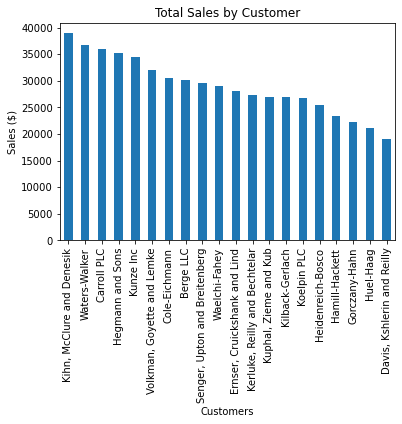

In [2]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals.sort_values(by='ext price',ascending=False))
#my_plot = sales_totals.plot(kind='bar')
# ext price高的排在前面
my_plot = sales_totals.sort_values(by='ext price',ascending=False).plot(
    kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
plt.show( )

## 分析與圖表顯示 4- 堆疊長條圖
+ 再請試著將銷售部分以類別細分。
+ 再將類別分組後的資料以堆疊長條圖方式顯示。

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

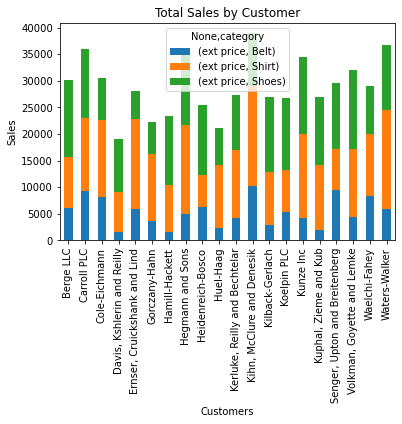

In [3]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head())
print("===================================")
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head())
print("===================================")
print(category_group.unstack().head( ))
print("===================================")
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
plt.show()

## 分析與圖表顯示 5- 堆疊長條圖調整
+ 圖例於視覺上造成阻礙。
+ 堆疊長條圖顯示方式略作調整。
+ loc編號
|功能         |編號|
|-------------|-----|
|最好(右上)預設| 0  |
|右上方	   | 1   |
|左上	       | 2|
|左下角	      | 3|
|右下	       | 4|
|對	        | 5|
|中左	       | 6|
|中右	       | 7|
|下中心	      | 8|
|上中	       | 9|
|中央	       | 10|

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

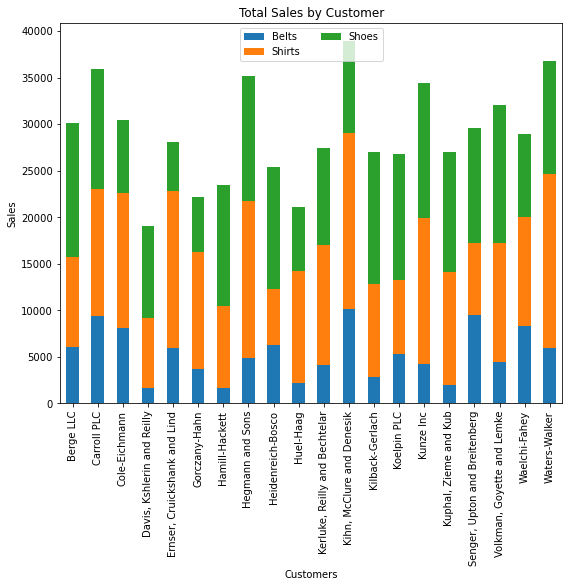

In [15]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head( ))
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head( ))
print(category_group.unstack( ).head( ))
my_plot = category_group.unstack( ).plot(
    kind='bar',stacked=True,title="Total Sales by Customer",
    figsize=(9, 7))#改變圖片大小
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"],
               loc=9,ncol=2)# loc上中 顯示3組 ncol=2 美欄顯示2組
plt.show( )


## 設計直方圖
+ 已經知道最大的客戶以及他們如何購買產品，我們可能希望更詳細地了解購買模式。
+ 讓我們再看一下數據並試著看看個人購買量有多大。
+ 直方圖允許我們將購買分組在一起，以便我們可以看到客戶交易的大小。
+ 我們可以建立一個包含 20 個資料的直方圖來顯示購買模式的分佈。


ext price    13
dtype: int64


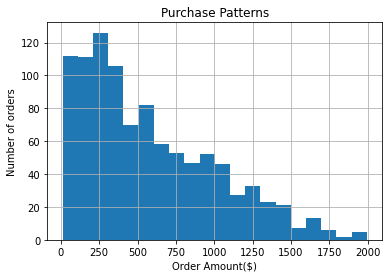

In [21]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price']]
# print(purchase_patterns[((purchase_patterns['ext price'] <2000 ) & (purchase_patterns['ext price'] >= 1750))])
print(purchase_patterns.query("`ext price`< 2000 & `ext price`>=1750").count())
purchase_plot = purchase_patterns['ext price'].hist(bins=20)#分成20份
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")#訂單金額
purchase_plot.set_ylabel("Number of orders")#此金額的訂單筆數
plt.show( )

## 日期重新採樣
+ 讓我們從另外一個角度，查看銷售額隨著時間的推移是否會更忙。
+ 我們按日期分析資料，我們需要使用日期列作為索引  。
+ 我們想要按月份查看資料，我們可以重新採樣並總結。
+ 我們可以使用 "M" 作為重新採樣的時間段，代表資料應在月底重新採樣。


   ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27
============================date======================
                     ext price
date                          
2014-09-27 07:13:03     578.24
2014-07-29 02:10:44    1018.78
2014-03-01 10:51:24     289.92
2013-11-17 20:41:11     413.40
2014-01-03 08:14:27    1793.52
==========================M========================
            ext price
date                 
2013-10-31   14085.27
2013-11-30   44932.78
2013-12-31   57752.23
2014-01-31   53161.35
2014-02-28   51783.56


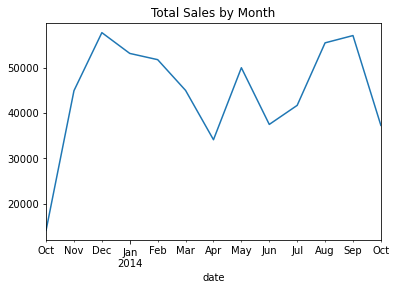

In [22]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price','date']]
print(purchase_patterns.head( ))
print("============================date======================")
purchase_patterns = purchase_patterns.set_index('date')
print(purchase_patterns.head( ))
print("==========================M========================")
print(purchase_patterns.resample('M').sum().head( ))
print("==================================================")
purchase_plot = purchase_patterns.resample('M').sum().plot(# 每個月的銷售額
    title="Total Sales by Month",legend=None)
plt.show( )
fig = purchase_plot.get_figure( )
fig.savefig("total-sales.png")